# 03 Reading bar charts - comparing two sets of data

In [1]:
import $ivy.`org.apache.spark::spark-sql:3.0.1`
import $ivy.`org.apache.spark::spark-mllib:3.0.1`
import $ivy.`org.plotly-scala::plotly-almond:0.8.0`

import $ivy.$                                  

import $ivy.$                                    

import $ivy.$                                      

In [3]:
import plotly._, plotly.element._, plotly.layout._, plotly.Almond._
import org.apache.spark.sql._
import org.apache.spark.sql.types._
import org.apache.spark.ml.feature.StringIndexer
import scala.collection.mutable.LinkedHashMap
import org.apache.log4j.{Level, Logger}
Logger.getLogger("org").setLevel(Level.OFF)
repl.pprinter() = repl.pprinter().copy(defaultHeight = 1)

import plotly._, plotly.element._, plotly.layout._, plotly.Almond._

import org.apache.spark.sql._

import org.apache.spark.sql.types._

import org.apache.spark.ml.feature.StringIndexer

import scala.collection.mutable.LinkedHashMap

import org.apache.log4j.{Level, Logger}


[khanacademy](https://www.khanacademy.org/math/ap-statistics/analyzing-categorical-ap/analyzing-one-categorical-variable/v/reading-bar-charts-2?modal=1)


![Reading bar charts - comparing two sets of data fig 1](./imgs/01-03-01.png)![Reading bar charts - comparing two sets of data fig 2](./imgs/01-03-02.png)![Reading bar charts - comparing two sets of data fig 3](./imgs/01-03-03.png)

In [13]:
val spark = {
  NotebookSparkSession.builder.appName("statistics").master("local").getOrCreate()
}

Loading spark-stubs
Creating SparkSession


Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties


Spark UI

spark: SparkSession = org.apache.spark.sql.SparkSession@6aedc077

In [14]:
import spark.implicits._

import spark.implicits._

In [15]:
val dataset = LinkedHashMap(
    "Student" -> Seq("Brandon", "Vanessa", "Daniel", "Kevin", "Wiliam"),
    "Midterm" -> Seq(85,60,60,65,100),
    "Final" -> Seq(90,90,65,80,95)
)

dataset: LinkedHashMap[String, Seq[Any]] = ...

In [16]:
val sdf = dataset.values.transpose.toList.map({case List(i: String, j: Int, k: Int) => (i, j, k)}).toDF(dataset.keys.toList:_*)
sdf.show()

+-------+-------+-----+
|Student|Midterm|Final|
+-------+-------+-----+
|Brandon|     85|   90|
|Vanessa|     60|   90|
| Daniel|     60|   65|
|  Kevin|     65|   80|
| Wiliam|    100|   95|
+-------+-------+-----+



sdf: DataFrame = [Student: string, Midterm: int ... 1 more field]

In [8]:
melt_df = df.reset_index().melt(id_vars="Student", var_name="Exam", value_name="Score")
melt_df

,Student,Exam,Score
0,Brandon,Midterm,85
1,Vanessa,Midterm,60
2,Daniel,Midterm,60
3,Kevin,Midterm,65
4,Wiliam,Midterm,100
5,Brandon,Final,90
6,Vanessa,Final,90
7,Daniel,Final,65
8,Kevin,Final,80
9,Wiliam,Final,95


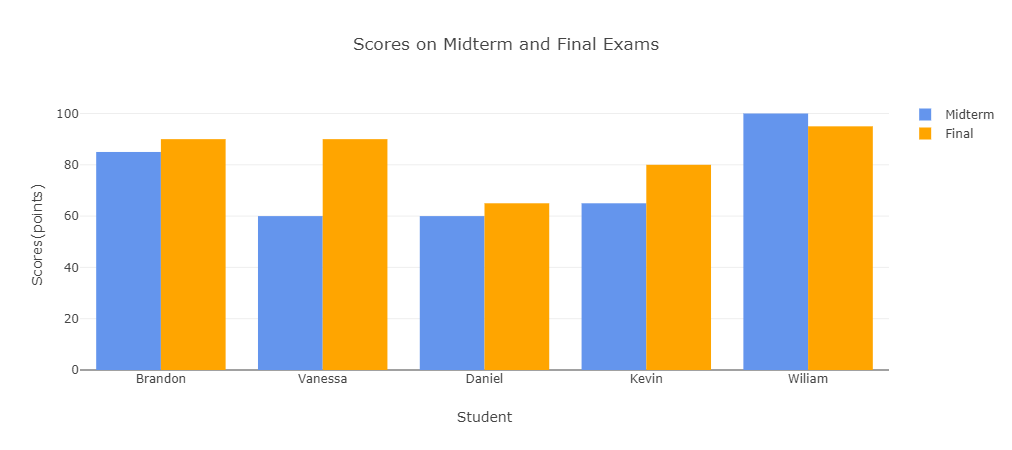

studentCol: Seq[String] = ...
midtermCol: Seq[Int] = WrappedArray(85, 60, 60, 65, 100)
finalCol: Seq[Int] = WrappedArray(90, 90, 65, 80, 95)
data: Seq[Bar] = ...
layout: Layout = ...
res32_5: String = "plot-cd4c1233-15f3-498a-bf46-b82bd7444797"

In [33]:
val studentCol = sdf.select("Student").collect().map(_(0).asInstanceOf[String]).toSeq
val midtermCol = sdf.select("Midterm").collect().map(_(0).asInstanceOf[Int]).toSeq
val finalCol = sdf.select("Final").collect().map(_(0).asInstanceOf[Int]).toSeq

val data = Seq(
    Bar(x=studentCol,
        y=midtermCol,
        name="Midterm",
        marker = Marker(color = Color.RGB(100,149,237))
       ),
    Bar(x=studentCol,
        y=finalCol,
        name="Final",
        marker = Marker(color = Color.RGB(255,165,0))
       )
)

val layout = Layout(
    title="Scores on Midterm and Final Exams",
    xaxis= Axis(title="Student"),
    yaxis= Axis(title="Scores(points)")
)

plot(data, layout)